In [208]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score

In [209]:
df = pd.read_csv('heart.csv')
df = df.drop_duplicates()

In [210]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot: xlabel='target', ylabel='count'>

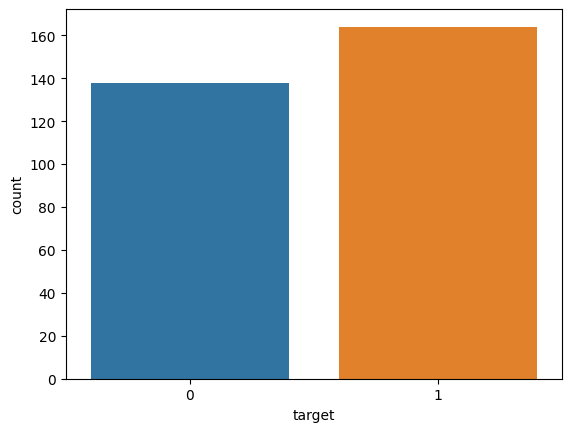

In [211]:
# target: Heart disease (1 = no, 0= yes)
sns.countplot(x = df['target'])

<AxesSubplot: xlabel='cp', ylabel='count'>

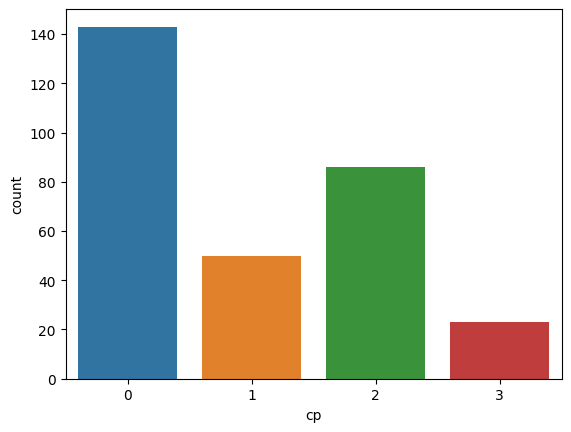

In [212]:
# cp: chest pain type
# — Value 0: asymptomatic
# — Value 1: atypical angina
# — Value 2: non-anginal pain
# — Value 3: typical angina
sns.countplot(x = df['cp'])

<AxesSubplot: xlabel='thal', ylabel='count'>

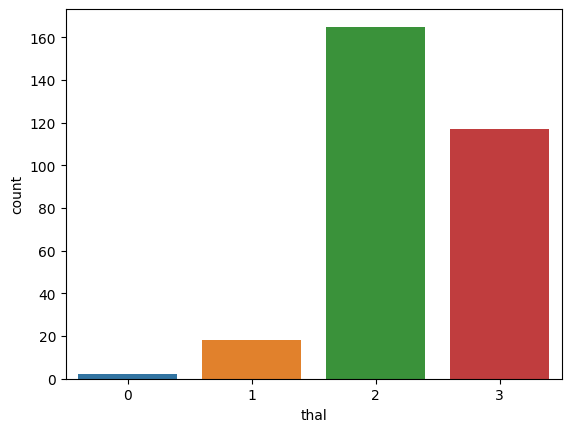

In [213]:
# A blood disorder called thalassemia
sns.countplot(x = df['thal'])

<AxesSubplot: xlabel='sex', ylabel='count'>

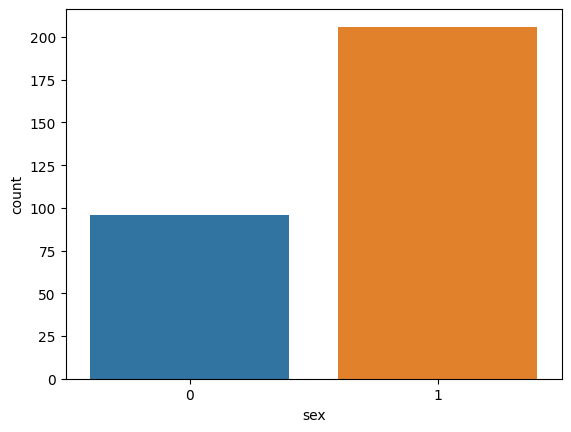

In [214]:
# The person’s sex (1 = male, 0 = female)
sns.countplot(x = df['sex'])

In [215]:
corr = df["target"].corr(df["cp"])
corr

0.43207959156640724

In [216]:
corr = df["thal"].corr(df["target"])
corr

-0.3431007123895647

In [217]:
corr = df["thal"].corr(df["cp"])
corr

-0.16036963435927665

In [218]:
x= df.iloc[:,0:13].values 
y= df['target'].values  

In [219]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [220]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

In [ ]:
# Error = [(Expected value − Actual value) / Actual value]
# Percentage error = [(Expected value − Actual value) / Actual value] x 100

Minimum error:- 0.10526315789473684 at K = 3


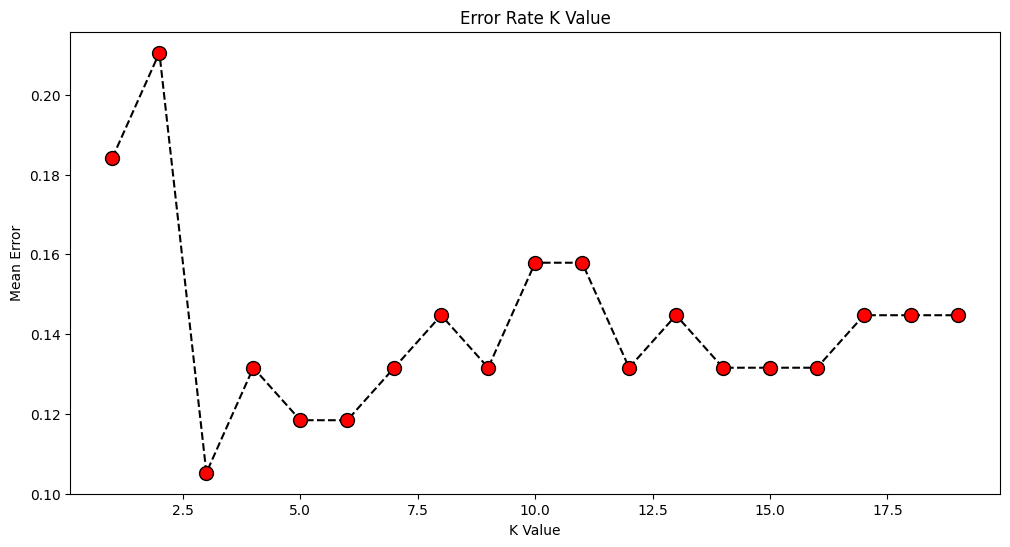

In [234]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [222]:
from sklearn.model_selection import GridSearchCV

In [232]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=30)
grid_search.fit(x, y)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best score: 0.692121212121212


In [247]:
classifier= KNeighborsClassifier(n_neighbors=3)  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=3)

In [248]:
y_pred= classifier.predict(x_test)  

In [249]:
accuracy_score(y_test, y_pred)

0.8947368421052632

In [226]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [227]:
cm

array([[30,  3],
       [ 5, 38]], dtype=int64)

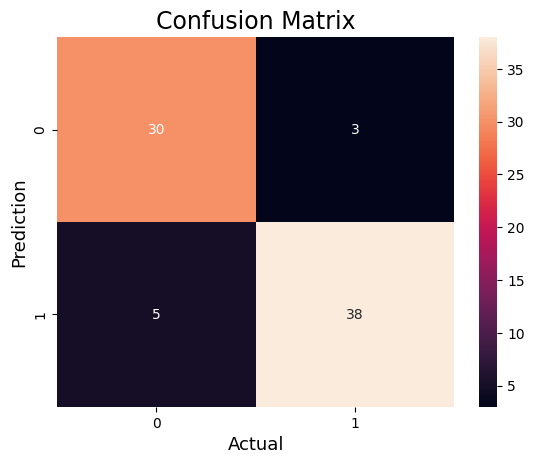

In [228]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()